#Linear Regression
- **Supervised Learning** algorithm (we provide both input and output)
- used for predicting continuous values
- finds a straight-line relationship between Independent variables and dependent variables.

In [ ]:
# Datatset Link: https://drive.google.com/file/d/1OlGpFxRfkaz94MM2kRIV23gQK2GFbSnx/view?usp=sharing

In [ ]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('/content/new_insurance_data (1).csv')

In [ ]:
df

,age,sex,bmi,children,smoker,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,region,charges
0,18.0,male,23.210,0.0,no,29087.54313,17.0,715428.0,4.720921e+06,0.0,5.578497e+07,southeast,1121.87390
1,18.0,male,30.140,0.0,no,39053.67437,7.0,699157.0,4.329832e+06,0.0,1.370089e+07,southeast,1131.50660
2,18.0,male,33.330,0.0,no,39023.62759,19.0,702341.0,6.884861e+06,0.0,7.352311e+07,southeast,1135.94070
3,18.0,male,33.660,0.0,no,28185.39332,11.0,700250.0,4.274774e+06,0.0,7.581968e+07,southeast,1136.39940
4,18.0,male,34.100,0.0,no,14697.85941,16.0,711584.0,3.787294e+06,0.0,2.301232e+07,southeast,1137.01100
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,33.0,female,35.530,0.0,yes,63142.25346,32.0,1091267.0,1.703805e+08,2.0,3.101107e+09,northwest,55135.40209
1334,31.0,female,38.095,1.0,yes,43419.95227,31.0,1107872.0,2.015152e+08,2.0,3.484216e+09,northeast,58571.07448
1335,52.0,male,34.485,3.0,yes,52458.92353,25.0,1092005.0,2.236450e+08,2.0,3.640807e+09,northwest,60021.39897
1336,45.0,male,30.360,0.0,yes,69927.51664,34.0,1106821.0,2.528924e+08,3.0,4.006359e+09,southeast,62592.87309


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   age                              1329 non-null   float64
 1   sex                              1338 non-null   object 
 2   bmi                              1335 non-null   float64
 3   children                         1333 non-null   float64
 4   smoker                           1338 non-null   object 
 5   Claim_Amount                     1324 non-null   float64
 6   past_consultations               1332 non-null   float64
 7   num_of_steps                     1335 non-null   float64
 8   Hospital_expenditure             1334 non-null   float64
 9   NUmber_of_past_hospitalizations  1336 non-null   float64
 10  Anual_Salary                     1332 non-null   float64
 11  region                           1338 non-null   object 
 12  charges             

In [ ]:
#EDA - Exploratory Data Analysis
#1. null values
#2. duplicate values
#3. outliers
#4. label encoding

In [ ]:
df.isnull().sum()

,0
age,9
sex,0
bmi,3
children,5
smoker,0
Claim_Amount,14
past_consultations,6
num_of_steps,3
Hospital_expenditure,4
NUmber_of_past_hospitalizations,2


In [ ]:
df.isnull().sum().sum()

np.int64(52)

In [ ]:
#Dropping null values
# df.dropna(inplace=True) inplace=permanent changes

In [ ]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'Claim_Amount',
       'past_consultations', 'num_of_steps', 'Hospital_expenditure',
       'NUmber_of_past_hospitalizations', 'Anual_Salary', 'region', 'charges'],
      dtype='object')

In [ ]:
for col in df.columns:
  if df[col].dtype == 'object':
    df[col]=df[col].fillna(df[col].mode()[0])
  else:
    df[col]=df[col].fillna(df[col].mean())

In [ ]:
df.isnull().sum().sum()

np.int64(0)

In [ ]:
#Duplicates

df.duplicated().sum()

np.int64(0)

In [ ]:
#If we had duplicates, drop them using
# df.drop_duplicates(inplace=True)

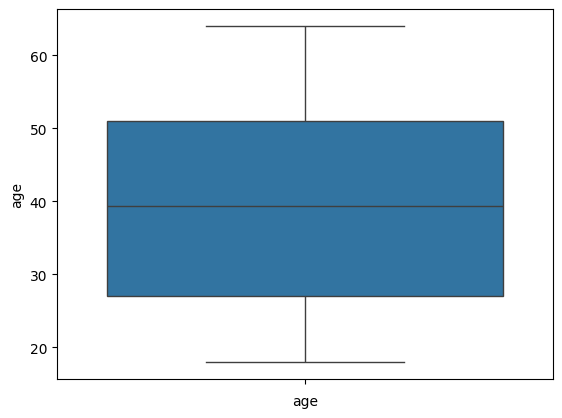

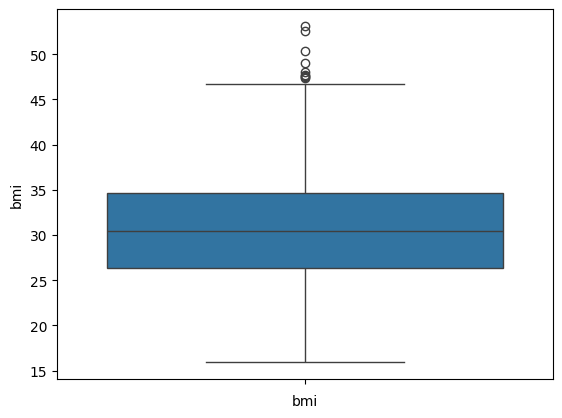

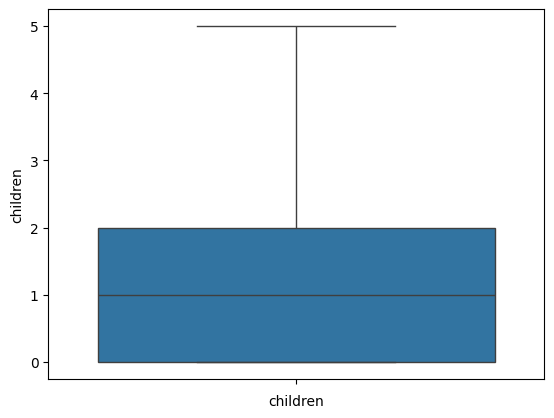

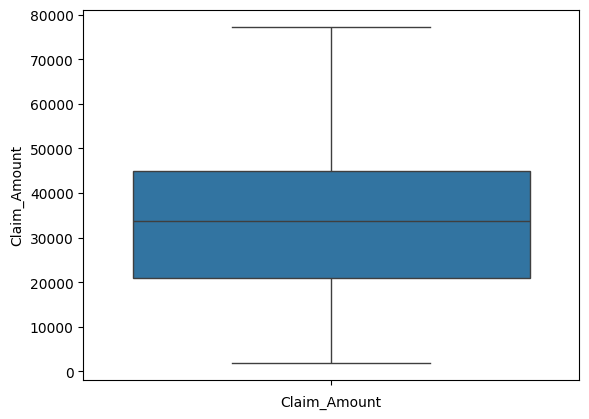

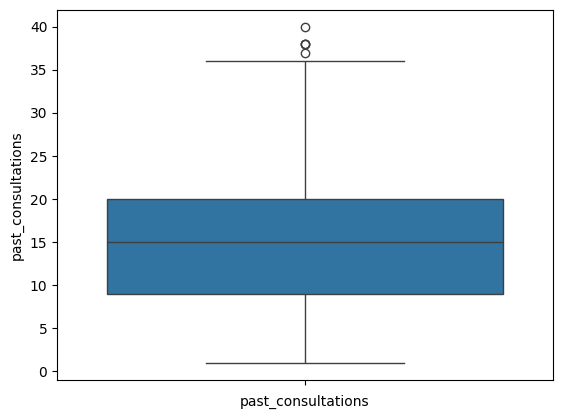

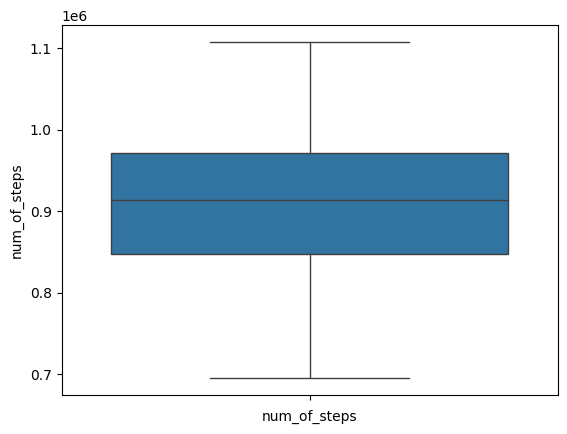

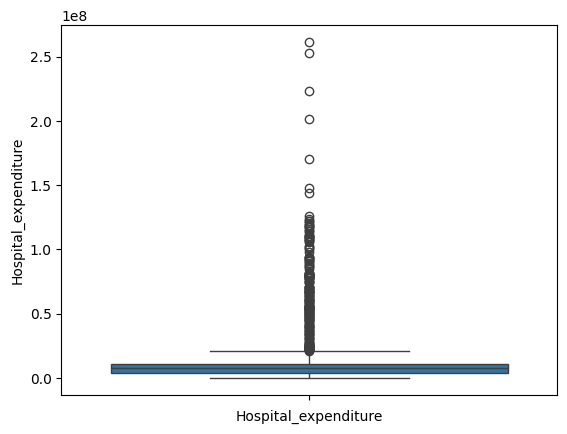

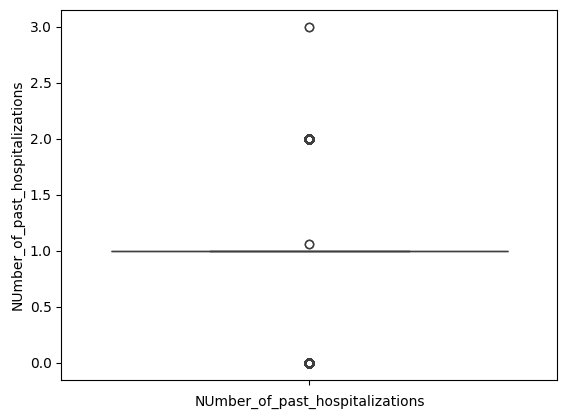

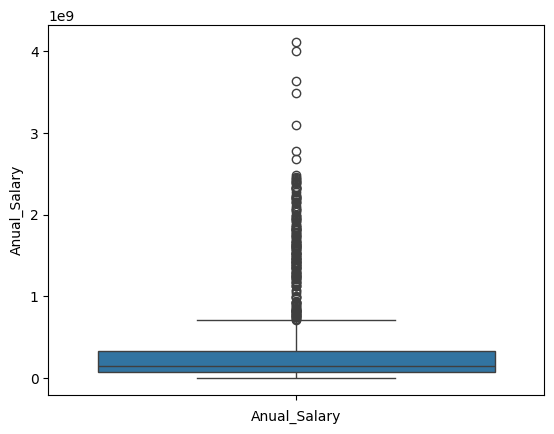

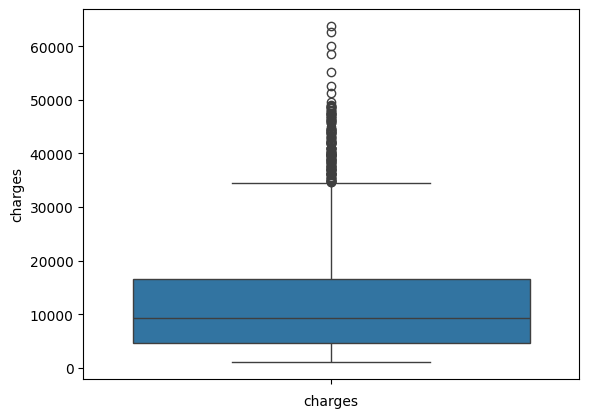

In [ ]:
#OUTLIER VISUALISATION

for col in df.columns:
  if(df[col].dtype != 'object'):
    sns.boxplot(df[col])
    plt.xlabel(col)
    plt.show()

#if no boxplot is visible, avoid touching that column because dropping
#outliers from that column might drop the whole column

In [ ]:
#OUTLIER REMOVAL
#The only columns we will avoid: 1. column with no boxplot, 2. Target column

out_list=['bmi', 'past_consultations', 'Hospital_expenditure','Anual_Salary']

for col in out_list:
  Q1=df[col].quantile(0.25)
  Q3=df[col].quantile(0.75)

  IQR=Q3-Q1

  LB=Q1-1.5*(IQR)
  UB=Q3+1.5*(IQR)

  df=df[(df[col]>=LB) & (df[col]<=UB)]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1030 entries, 0 to 1069
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   age                              1030 non-null   float64
 1   sex                              1030 non-null   object 
 2   bmi                              1030 non-null   float64
 3   children                         1030 non-null   float64
 4   smoker                           1030 non-null   object 
 5   Claim_Amount                     1030 non-null   float64
 6   past_consultations               1030 non-null   float64
 7   num_of_steps                     1030 non-null   float64
 8   Hospital_expenditure             1030 non-null   float64
 9   NUmber_of_past_hospitalizations  1030 non-null   float64
 10  Anual_Salary                     1030 non-null   float64
 11  region                           1030 non-null   object 
 12  charges                  

In [ ]:
#Label Encoding: conversion of object(alphabetical/string) data into numerical

from sklearn.preprocessing import LabelEncoder

LE=LabelEncoder()

for col in df.columns:
  if(df[col].dtype == 'object'):
    df[col]=LE.fit_transform(df[col])

In [ ]:
#research about how we can get to know the numerical value given to category and try printing "Category" -> "number"
# .classes_

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1030 entries, 0 to 1069
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   age                              1030 non-null   float64
 1   sex                              1030 non-null   int64  
 2   bmi                              1030 non-null   float64
 3   children                         1030 non-null   float64
 4   smoker                           1030 non-null   int64  
 5   Claim_Amount                     1030 non-null   float64
 6   past_consultations               1030 non-null   float64
 7   num_of_steps                     1030 non-null   float64
 8   Hospital_expenditure             1030 non-null   float64
 9   NUmber_of_past_hospitalizations  1030 non-null   float64
 10  Anual_Salary                     1030 non-null   float64
 11  region                           1030 non-null   int64  
 12  charges                  

In [ ]:
df

,age,sex,bmi,children,smoker,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,region,charges
0,18.0,1,23.210,0.0,0,29087.54313,17.0,715428.0,4.720921e+06,0.0,5.578497e+07,2,1121.87390
1,18.0,1,30.140,0.0,0,39053.67437,7.0,699157.0,4.329832e+06,0.0,1.370089e+07,2,1131.50660
2,18.0,1,33.330,0.0,0,39023.62759,19.0,702341.0,6.884861e+06,0.0,7.352311e+07,2,1135.94070
3,18.0,1,33.660,0.0,0,28185.39332,11.0,700250.0,4.274774e+06,0.0,7.581968e+07,2,1136.39940
4,18.0,1,34.100,0.0,0,14697.85941,16.0,711584.0,3.787294e+06,0.0,2.301232e+07,2,1137.01100
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1046,29.0,0,27.940,1.0,1,51168.25474,23.0,993751.0,1.665982e+07,1.0,3.712188e+08,2,19107.77960
1048,31.0,1,25.900,3.0,1,46619.40230,27.0,989387.0,1.361938e+07,1.0,3.812895e+08,3,19199.94400
1050,31.0,1,29.810,0.0,1,24382.58056,21.0,973924.0,1.028991e+07,1.0,3.745310e+08,2,19350.36890
1062,43.0,0,20.045,2.0,1,21596.43846,10.0,994419.0,1.083030e+07,1.0,3.696849e+08,0,19798.05455


In [ ]:
#MODEL BUILDING
#1. splitting the data into x(feature), y(target)
#2. splitting in terms of training and testing data
#3. model initialization
#4. train the model
#5. prediction
#6. evaluation

In [ ]:
x=df.iloc[:,:-1]
#x=df.drop('Charges')

y=df['charges']

In [ ]:
x

,age,sex,bmi,children,smoker,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,region
0,18.0,1,23.210,0.0,0,29087.54313,17.0,715428.0,4.720921e+06,0.0,5.578497e+07,2
1,18.0,1,30.140,0.0,0,39053.67437,7.0,699157.0,4.329832e+06,0.0,1.370089e+07,2
2,18.0,1,33.330,0.0,0,39023.62759,19.0,702341.0,6.884861e+06,0.0,7.352311e+07,2
3,18.0,1,33.660,0.0,0,28185.39332,11.0,700250.0,4.274774e+06,0.0,7.581968e+07,2
4,18.0,1,34.100,0.0,0,14697.85941,16.0,711584.0,3.787294e+06,0.0,2.301232e+07,2
...,...,...,...,...,...,...,...,...,...,...,...,...
1046,29.0,0,27.940,1.0,1,51168.25474,23.0,993751.0,1.665982e+07,1.0,3.712188e+08,2
1048,31.0,1,25.900,3.0,1,46619.40230,27.0,989387.0,1.361938e+07,1.0,3.812895e+08,3
1050,31.0,1,29.810,0.0,1,24382.58056,21.0,973924.0,1.028991e+07,1.0,3.745310e+08,2
1062,43.0,0,20.045,2.0,1,21596.43846,10.0,994419.0,1.083030e+07,1.0,3.696849e+08,0


In [ ]:
y

,charges
0,1121.87390
1,1131.50660
2,1135.94070
3,1136.39940
4,1137.01100
...,...
1046,19107.77960
1048,19199.94400
1050,19350.36890
1062,19798.05455


In [ ]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.80,random_state=0)
#random_state: fixes a set of sequence of rows
#splits the dataset into training(80%) and testing data(20%)
#x-train & test : Features(input data) for training and testing
#y-train & test : Target(output data) for training and testing

In [ ]:
x_train #questions for training

,age,sex,bmi,children,smoker,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,region
746,55.0,1,27.645,0.0,0,25238.363470,11.0,935369.0,2.086869e+06,1.0,1.649883e+08,1
641,50.0,0,25.600,0.0,0,37222.476360,9.0,906234.0,6.062378e+06,1.0,9.657123e+07,3
999,19.0,1,26.030,1.0,1,30825.190070,11.0,953289.0,5.923489e+06,1.0,3.029514e+08,1
281,33.0,0,24.310,0.0,0,9560.754493,15.0,821360.0,3.185350e+06,1.0,7.490390e+07,2
802,52.0,0,38.380,2.0,0,12992.139950,24.0,933863.0,4.075903e+06,1.0,2.061268e+08,0
...,...,...,...,...,...,...,...,...,...,...,...,...
279,30.0,0,32.400,1.0,0,20150.675120,9.0,832253.0,1.747107e+05,1.0,6.328892e+07,3
768,57.0,1,28.100,0.0,0,9582.708574,11.0,929888.0,1.046259e+07,1.0,1.850292e+08,3
841,58.0,1,30.305,0.0,0,31405.793590,12.0,939497.0,9.380141e+06,1.0,2.118739e+08,0
561,44.0,1,37.100,2.0,0,9816.604000,12.0,897353.0,8.134594e+05,1.0,1.287152e+08,3


In [ ]:
y_train

,charges
746,10594.50155
641,8932.08400
999,16450.89470
281,4185.09790
802,11396.90020
...,...
279,4149.73600
768,10965.44600
841,11938.25595
561,7740.33700


In [ ]:
x_test

,age,sex,bmi,children,smoker,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,region
752,55.0,0,30.500,0.0,0,33948.245030,14.0,937388.0,2852368.952,1.0,1.322794e+08,3
723,52.0,0,23.180,0.0,0,55314.076930,22.0,916140.0,8962514.811,1.0,1.811501e+08,0
177,18.0,0,32.120,2.0,0,5496.365185,7.0,797369.0,4728536.620,1.0,5.833210e+07,2
834,58.0,0,33.100,0.0,0,22778.601030,24.0,938607.0,5349680.612,1.0,2.223391e+08,3
718,50.0,0,23.540,2.0,0,11951.090250,4.0,912317.0,5368280.300,1.0,1.787119e+08,2
...,...,...,...,...,...,...,...,...,...,...,...,...
627,49.0,1,22.515,0.0,0,49140.254220,10.0,898863.0,4776407.417,1.0,9.172299e+07,0
993,64.0,0,39.050,3.0,0,20212.558840,16.0,969374.0,4530674.378,1.0,2.787266e+08,2
426,38.0,0,30.690,1.0,0,45637.390130,5.0,882082.0,9278303.409,1.0,6.394902e+07,2
895,59.0,1,29.700,2.0,0,12770.132490,24.0,959985.0,4895703.017,1.0,2.081729e+08,2


In [ ]:
y_test

,charges
752,10704.47000
723,10197.77220
177,2801.25880
834,11848.14100
718,10107.22060
...,...
627,8688.85885
993,16085.12750
426,5976.83110
895,12925.88600


In [ ]:
from sklearn.linear_model import LinearRegression

model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [ ]:
y_pred=model.predict(x_test)
y_pred

array([10673.05379386, 10699.83913277,  2186.42137227, 12338.3992225 ,
       10192.54061284,  2659.12550603,  5426.76886444,  3469.69259011,
       -1236.78004738,   645.14063915, 10735.69608956,  5503.26187972,
        4188.64912171,  8913.27002711,  6628.23029558,  7463.34273721,
        5465.49165123, 11980.87478663, 10057.88642839,  4164.93396762,
        6533.0341331 ,  8865.63767755,  6362.50895216, 12362.32372637,
        8793.35906773,  9370.32302948,  1829.03732801,  2874.64700627,
        7856.29241268,  5288.74114771,  9778.89446706, 11670.7324405 ,
        9573.29263577,   415.58680878, 11262.15425772,  8954.5497901 ,
        1968.30497397,  4441.28668098,  9834.3508545 ,  2171.08939588,
        1099.20442563,  9634.76758644, 11986.27375949,  5983.91725543,
        5766.43661608,  3159.18006441,  9702.42612908, 11240.08293307,
        1723.15446348,  1471.03076201, 12509.43688055, 11824.73170653,
       11101.97278459,  4156.31678175,  7673.94672661,  4857.9039852 ,
      

In [ ]:
result=pd.DataFrame(columns=['Actual_values','Predicted_values'])
result['Actual_values']=y_test
result['Predicted_values']=y_pred
result

,Actual_values,Predicted_values
752,10704.47000,10673.053794
723,10197.77220,10699.839133
177,2801.25880,2186.421372
834,11848.14100,12338.399223
718,10107.22060,10192.540613
...,...,...
627,8688.85885,8209.580049
993,16085.12750,14735.394889
426,5976.83110,6725.909135
895,12925.88600,13030.191315


In [ ]:
from sklearn.metrics import * # * = all the data

res=r2_score(y_test,y_pred)
res*100

94.75771114615571

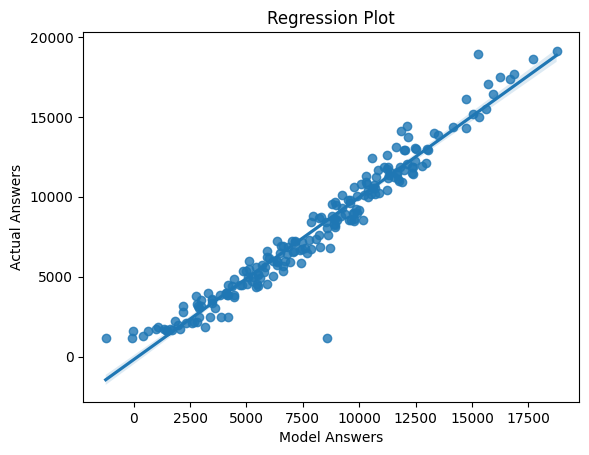

In [ ]:
sns.regplot(x=y_pred,y=y_test)
plt.title("Regression Plot")
plt.xlabel('Model Answers')
plt.ylabel('Actual Answers')
plt.show()